# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,11594,7779,12144,3252,8035,3029
2,4446,906,1238,3576,153,1014


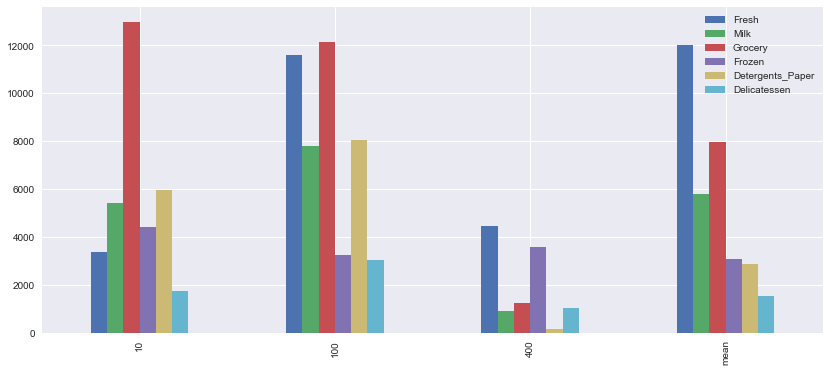

In [76]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# indices = [0,1,2]
indices = [10,100,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

'''
Further improvement could be done by comparing the sample points with the dataset’s mean.
Please look at the following code blocks:
'''
import seaborn as sns
sample_bars = samples.append(data.describe().loc['mean'])
sample_bars.index = indices + ['mean']
_ = sample_bars.plot(kind='bar', figsize=[14,6])

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first customer I selected was able to see that all of the other product groups except Fresh products made more than average purchases. Among them, Grocery products were purchased twice as much on average. This could be thought of as a customer operating a Grocery retail store.

The second customer seems to have averaged over all product lines including Fresh, Grocery, and Detergents_Paper products. As a result, it can be assumed that it will sell a comprehensive merchandise such as Supermarket. Considering the amount of purchasing, it may be thought that it operates the largest of wholesale customers.

The third customer has purchased more than average Frozen products, and the overall volume of purchases is relatively small. From here I thought I might be running a convenient store that is specialized in a small amount of Frozen.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split

for _column in data.columns:
    new_data = data.drop(_column,axis=1)
    new_label = data[[_column]]

    # print new_data.columns
    # print new_label.columns

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.25, random_state=42)
    # print X_train.shape, y_train.shape
    # print X_test.shape, y_test.shape

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)
    # y_pred=regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print _column, ' : ', score

Fresh  :  -0.385749710204
Milk  :  0.156275395017
Grocery  :  0.681884008544
Frozen  :  -0.210135890125
Detergents_Paper  :  0.271666980627
Delicatessen  :  -2.2547115372


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I modified the code somewhat and created an example using all the feature points. As a result of writing, 3 were positive and 3 were negative. The results are following :

```
Fresh  :  -0.385749710204
Milk  :  0.156275395017
Grocery  :  0.681884008544
Frozen  :  -0.210135890125
Detergents_Paper  :  0.271666980627
Delicatessen  :  -2.2547115372
```

Fresh, Frozen, and Delicatessen, the R ^ 2 score was negative for the three feature points, and it was difficult to see that the three characteristics were consistent with the customer's propensity and consumption pattern.

On the other hand, as a result of choosing Grocery, the R ^ 2 score appeared to be close to 0.7, and it seemed to be able to replace all other columns with this feature point.


```
: Udacity Review 

In order to remove randomness of your algorithms, and to make sure your results don’t differ at each run, please consider to always use a random seed to seed your algorithms.
A standard practice I’ve come across is to define a random seed as a global variable in your work, and to use it throughout all the algorithms/methods which require random number generation (splitting data, decision tree initialisation, neural network weight initialisation etc).
In sklearn, as far as I know, random seeds are provided to methods and functions using the parameter random_state. Please seed all of your algorithms in the future if you haven’t been doing so yet
Moreover, you are right, Grocery, Detergents_Paper are strongly predictable. Since R2 is the coefficient of determination, the score is a significant positive score (within 0 and 1), thus this means that the feature could be predicted by other features. The feature may not be necessary for identifying customers' spending habits if other correlated features are presented.
```

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

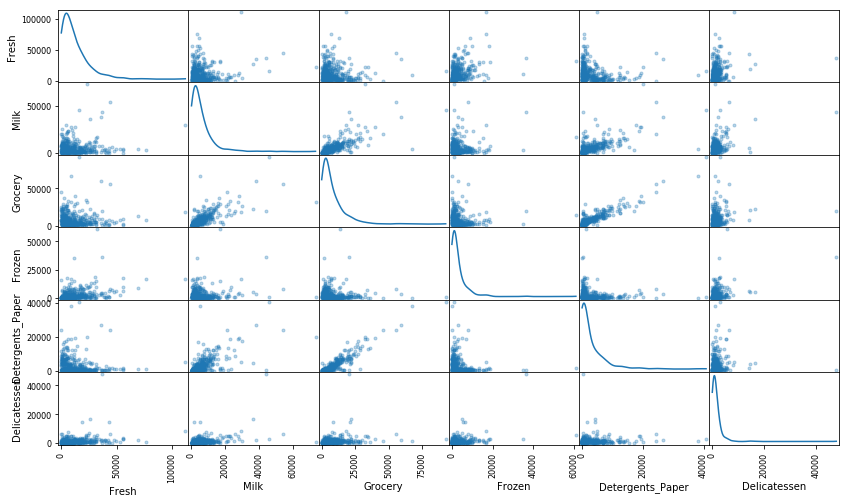

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The R2 score is a score based on the corelation between each variable. The corresponding score shows the mutual influence of the variables. In the above results, three variables with a positive number score are related to the results. (It is expressed as a negative number if it is judged to be unrelated.)

Therefore, Grocery + Detergents_Paper, Grocery + Milk, Detergents_Paper + Milk Three pairs seem to be related.

As a result of previous problems, I think that Grocery 's R ^ 2 score score is significantly higher than other minutiae. Using this scatter_matrix, I was able to determine exactly what feature points Grocery was associated with.

What I expected was content about Grocery features. My prediction was that Grocery would represent all of the features in one go, but in reality it was a bit different. Grocery had a difficult distribution in that it had mutual influence with Delicatessen, Fresh, and Frozen feature points. On the other hand, as previously mentioned, Detergents_Paper, Milk had a directional distribution.

Also, the scatterplot results show that the distribution of the data can be known. Most of the data is skewed to one side. If the data is skewed to one side, it is necessary to normalize the distribution because the result is distorted due to the outlier while learning.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.121480  8.594710  9.470703  8.389360          8.695674      7.463937
1  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988
2  8.399760  6.809039  7.121252  8.182000          5.030438      6.921658


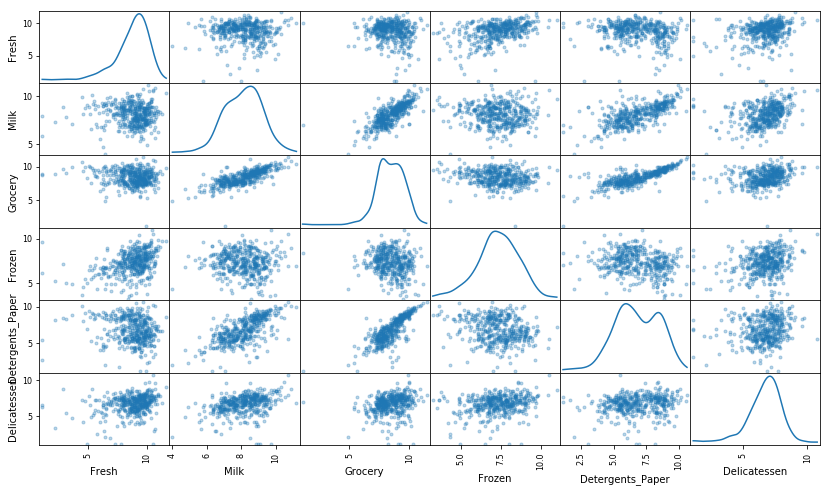

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
# print log_data

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)
print log_samples

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [148]:
# outliers_indices = {}
from collections import Counter

counter_indices = Counter()
outliers_indices = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # print "Q1 : ", Q1, "Q3 : ", Q3, "step : ", 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_indices[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    counter_indices.update(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
#     display(log_data.loc[outliers_indices[feature],:])

# OPTIONAL: Select the indices for data points you wish to remove
'''
Here we find 42 outliers, in 440 samples, nearly 10 percentage of the total number. 
If we remove all the outlier, we would lose a lots of information.
In this case, we should find some samples that are considered outliers for more than one feature.
'''
outliers = set()
for feature in outliers_indices:
    outliers = outliers | set(outliers_indices[feature])
outliers = list(outliers)
print 'outliers of all features : ',outliers

'''
By use python list and set, we found 5 samples, So we remove those 5 samples instead of remove all the outlier 
to keep the information in the samples and make sure we have enough samples to analyse.
'''
repeated_outliers=[]
for el in counter_indices.elements():
    if counter_indices[el]>1:
        repeated_outliers.append(el)
print "Following records are outliers for more than one feature:", list(set(repeated_outliers))

# Remove the outliers, if any were specified
# good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data = log_data.drop(log_data.index[repeated_outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicatessen':
outliers of all features :  [128, 193, 264, 137, 142, 145, 154, 412, 285, 289, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 75, 325, 161, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]
Following records are outliers for more than one feature: [128, 65, 154, 75, 66]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes. When outlier was identified using Turkey's method, there were many outliers for each feature point.

I think these outliers should be removed. 

Logarithmic scaling If you look at the scatterplot of the data, the data extracted here is out of the range of the data. For example, in the case of fresh products with the most outliers, most of the data appears to have a distribution of about 7.5 to 10. For outlier values, there are many values between 1 and 5. I think it would be helpful for us to analyze this data if this data is sufficiently separated by outliers.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

0 d explained_variance_ratio_ :  0.44302504749
0 d components_ :  [-0.16746374  0.40143866  0.43811142 -0.17820975  0.75142613  0.14987105]
1 d explained_variance_ratio_ :  0.263792183317
1 d components_ :  [ 0.68593522  0.16722783  0.07072902  0.50054207  0.04244398  0.49414702]
2 d explained_variance_ratio_ :  0.12306380111
2 d components_ :  [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
3 d explained_variance_ratio_ :  0.101209078034
3 d components_ :  [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]


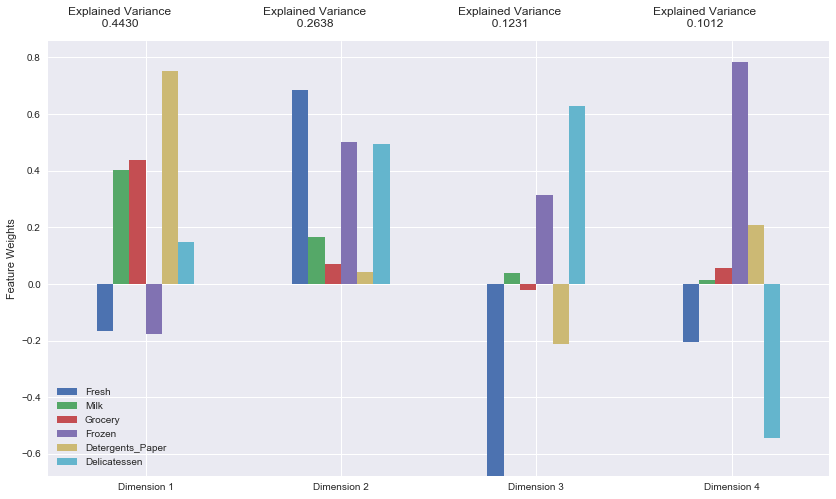

In [174]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

n_comp=4
pca = PCA(n_components=n_comp)
# pca = PCA()
pca.fit(good_data)

for i in range(0,n_comp,1):
    print i,'d explained_variance_ratio_ : ', pca.explained_variance_ratio_[i]
    print i,'d components_ : ', pca.components_[i]

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# display(pca_results)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first component showed 0.499304838075 and the second component showed variance explained as 0.225948066791.

The the first components appear to be milk, grocery, and detergent_paper. Detergents_paper with meaningful positive weight on Milk and Grocery. This dimension is best categorized by customer spending on restaurant or hostage. 

In the case of the second principal component, it is seen that the three characteristic points are related to each other by considering the transformation by weighting Fresh, Frozen, and Delicatessen. I think the result of this principal component analysis represents consumer spending to resell things to the general consumer.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [178]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,2.0887,0.7006,0.8537,1.0105
1,2.3579,1.7393,0.2210,0.2840
2,-2.5025,-0.1006,1.0091,0.1630


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [179]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# display(reduced_data)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [180]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0887,0.7006
1,2.3579,1.7393
2,-2.5025,-0.1006


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

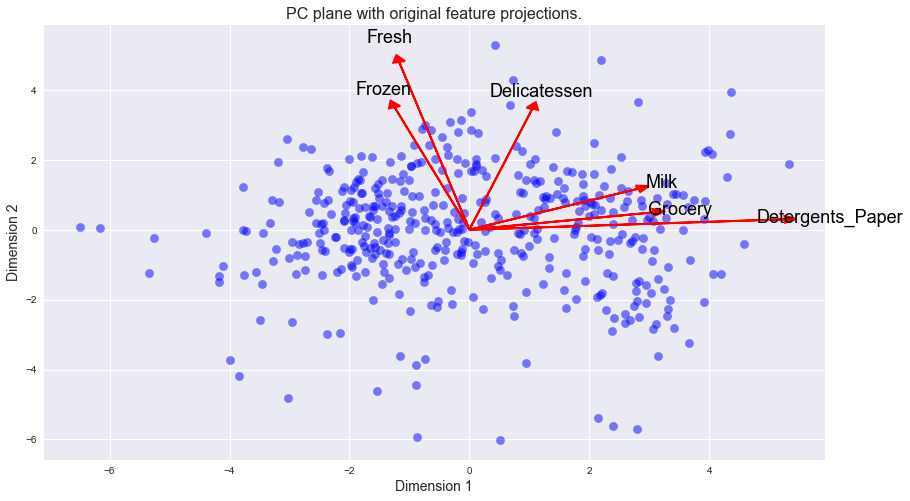

In [181]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The k-means algorithm is simple and can be applied to various domains that do not know information in advance. Also, k-means has the advantage of simple calculation because of simplicity of algorithm. (Only the distance formula is required)

The k-means is an algorithm with a large deviation according to the initial value k since it obtains the data set of the minimum distance based on the euclidean distance of the data. Then, the k-mean algorithm calculates the similarity by simply calculating the distance, and there is a problem that the result is unreliable when the definition of the similarity itself is applied to difficult data. 

To overcome this problem, the gaussian probability model algorithm is applied to the classification of probability. However, there is a limitation that GPM is difficult to apply if it is not uni-modal data, and GMM (Expectation Maximization) is a way to overcome this limitation. The method is to apply several Gaussian models to data classification.

I think it is good to apply KMeans as an algorithm to solve this problem.

Currently, we have standardized the data distribution by applying logarithmatic data, and we have extracted only the main component of the data by applying PCA. Therefore, it is expected that kmean or gmm will show similar performance without big difference in this case. If the results are similar, it would be advantageous to apply kMeans which is easy to calculate.


```
: Udacity Review

The difference between KMeans and GMM are about hard or soft assignment:
Let's says we are aiming to break them into three clusters, as above. K means will start with the assumption that a given data point belongs to one cluster.
Choose a data point. At a given point in the algorithm, we are certain that a point belongs to a red cluster. In the next iteration, we might revise that belief, and be certain that it belongs to the green cluster.
However, remember, in each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment".
What if we are uncertain? What if we think, well, I can't be sure, but there is 70% chance it belongs to the red cluster, but also 10% chance its in green, 20% chance it might be blue. That's a soft assignment.
The Mixture of Gaussian model helps us to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments.
As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.
```

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [182]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# The following code, Data Visualization, requires cluster 2 private data results, 
# reducing the number of clusters from five to two.
for n_cluster in range(5,1,-1):
#     clusterer = GMM(n_components=2, random_state=42)
    clusterer = KMeans(n_clusters=n_cluster, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # print preds

    # TODO: Find the cluster centers
    if isinstance(clusterer, KMeans):
        centers = clusterer.cluster_centers_
        print '\t', 'cluster_centers_ : ', centers
    elif isinstance(clusterer, GMM):
        # For GMM, the center value is means.
        centers = clusterer.means_
        print '\t', 'means_ : ', centers
        

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print 'cluster # : ',n_cluster, ', silhouette_score : ', score

	cluster_centers_ :  [[ 2.46489054 -2.36797983]
 [-1.03210924  1.56132497]
 [-2.79224416 -0.61734971]
 [-0.4990862  -0.81839496]
 [ 2.26923509  0.8467196 ]]
cluster # :  5 , silhouette_score :  0.349997797526
	cluster_centers_ :  [[ 2.11389956 -2.09087287]
 [-2.10449052 -0.93849594]
 [-0.89218367  1.1591779 ]
 [ 2.23374077  0.84600357]]
cluster # :  4 , silhouette_score :  0.331841276009
	cluster_centers_ :  [[-1.74395866 -0.04085513]
 [ 1.59016368  1.23678893]
 [ 1.90807636 -2.0962454 ]]
cluster # :  3 , silhouette_score :  0.39689092645
	cluster_centers_ :  [[-1.49093664  0.10743169]
 [ 2.17322969 -0.15659534]]
cluster # :  2 , silhouette_score :  0.426281015469


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score according to the number of clusters is as follows.

```
cluster # :  2 , silhouette_score :  0.447157742293
cluster # :  3 , silhouette_score :  0.36398647984
cluster # :  4 , silhouette_score :  0.331150954285
cluster # :  5 , silhouette_score :  0.353193403287
```

When the number of clusters exceeds 2, the silhouette score is gradually lowered. When scatterplotting the PCA results of the previous studies, it was confirmed that there would be two class of customers.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

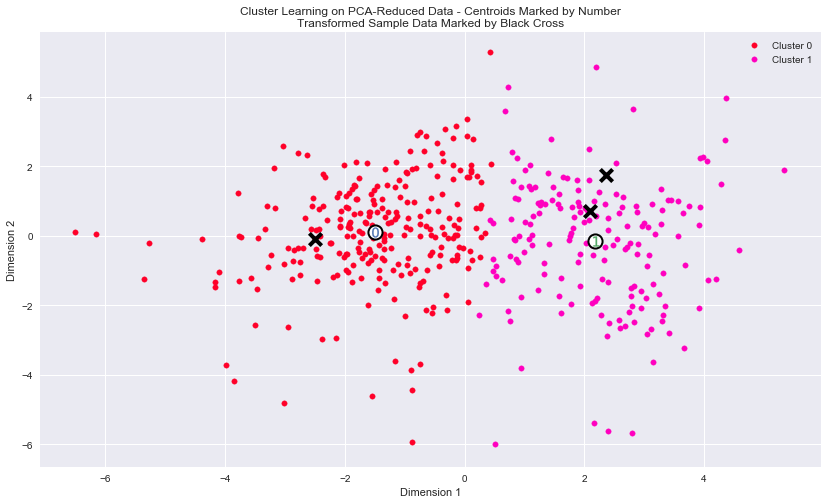

In [183]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


segment 0 total purchase cost :  16304.0
segment 1 total purchase cost :  30558.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


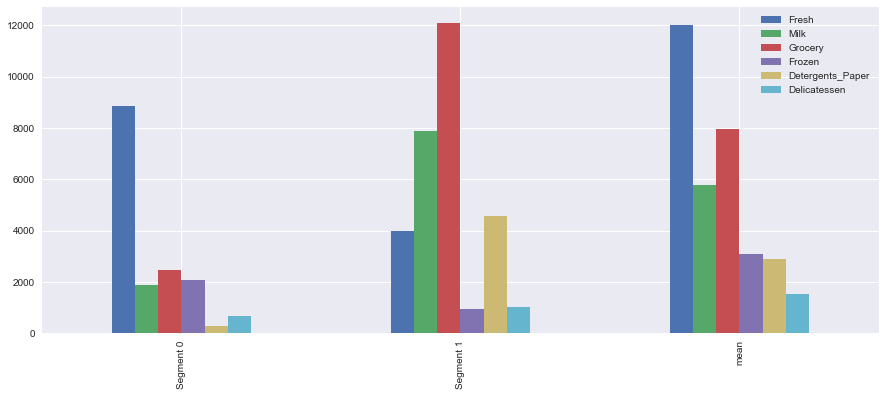

In [186]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print 'segment 0 total purchase cost : ', np.sum(true_centers.loc['Segment 0'])
print 'segment 1 total purchase cost : ', np.sum(true_centers.loc['Segment 1'])

# --------------------------------------------------
# Display a description of the dataset (original)
display(data.describe())

'''
Similar to question 1, you may consider to visualise the amount of each product purchased for each true_center, together with the dataset mean.

For example,
'''

import seaborn as sns
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

The biggest difference between the two segments seems to be the difference in the total purchase amount.

For the time being, segment 0 of the two segments appears to be a customer operating a small store. The total purchase amount of each article item is less than average. In the case of Detergent_paper and Delicatessen, it is assumed that it is not the customer who operates the restaurant because it purchases much less than the average.

Segment 1 customers can see that their purchase size is significantly larger than zero. In addition, the purchase of Detergent_papers, Delicatessen

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [71]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Here are my comments on the 3 sample headers that I predicted for the first time.

```
The first customer I selected was able to see that all of the other product groups except Fresh products made more than average purchases. Among them, Grocery products were purchased twice as much on average. This could be thought of as a customer operating a Grocery retail store.

The second customer seems to have averaged over all product lines including Fresh, Grocery, and Detergents_Paper products. As a result, it can be assumed that it will sell a comprehensive merchandise such as Supermarket. Considering the amount of purchasing, it may be thought that it operates the largest of wholesale customers.

The third customer has purchased more than average Frozen products, and the overall volume of purchases is relatively small. From here I thought I might be running a convenient store that is specialized in a small amount of Frozen.
```

I do not know what the actual business of the customer is, but the results showed that customers 0 and 1 were classified as zero segment in that they expected to operate a large store or retail store. On the other hand, in case of customer No. 2, the result is classified into the first segment similar to the expectation that a small convenience store will be operated.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

When performing an A / B test, you must sample each of the customer groups for testing. At this time, we can use the unsupervised learning we have learned now. Because you can not test for all customers, you can classify the clusters to represent the customer group, extract the sample customers to be tested for each cluster, and test the policy beforehand. Even if you do not test the entire customer, this test can help you identify factors that might be a problem for your group's policies.

In order for the A / B test to be meaningful, the test group should have a representative of the entire customer. In this case, it is meaningful to divide the customer group into clusters in order to extract samples representing the customer's representative.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

You can label new customers using whatever your existing customer information is. Unlike the example, there may not be channel-like feature points in practice. If this is the case, you will be able to create a label like segment 0, 1 and categorize the customer. The supervised learning with these labels will be able to be used to predict new data if the new incoming customers are classified.

Assuming that new customers in this way consume the average consumption of each product group consumed by the existing customer, it will be possible to calculate the increase in the amount of goods due to the increase in new customers in advance.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

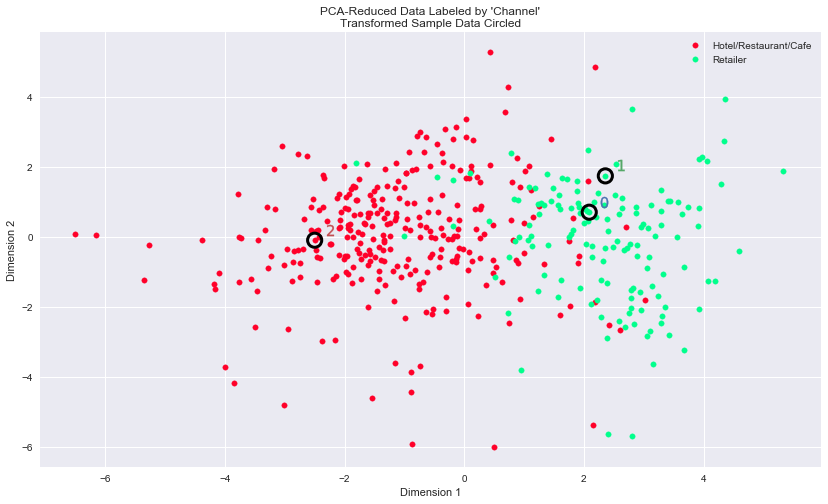

In [188]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, repeated_outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The end result shows that our clustering algorithm classifies the customers quite accurately. (In fact, it was surprising that it was more accurate than expected.) At the border of the cluster, the customer group was somewhat ambiguous in both groups, but a significant part could accurately predict the two customer groups.

And as predicted, sample # 1 and # 1 customers were almost exactly as predicted, as expected, to be large-scale and market for food. It is interesting to note that the conclusions based on the content obtained through the PCA were consequently true. I was able to get insight into the data through the PCA.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.